# **Customer Turnover Analysis**

## Objective

Create a predictive model to identify customers likely to churn using the Telco Customer Churn dataset.

Goals:
- Clean and preprocess the data (handle missing values, encode categorical features, scale numerical features).
- Explore the data to understand patterns and relationships (EDA, visualizations).
- Train and evaluate classification models (e.g., Logistic Regression, Random Forest) using appropriate metrics: accuracy, precision, recall, F1-score, and AUC.
- Select the best-performing model, analyze feature importance, and provide a reproducible prediction pipeline.

## Telco Customer Churn — Dataset Overview

Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Brief: Customer-level data from a telecom company used to predict churn (whether a customer will leave). Typical use: classification modeling, feature analysis and churn-driving factor exploration.

Dataset (original): ~7,043 rows, 21 columns.

Columns
- customerID (string)  
    Unique customer identifier. Typically removed before modeling.

- gender (categorical: "Male"/"Female")  
    Customer gender.

- SeniorCitizen (int: 0/1)  
    Binary flag indicating whether the customer is a senior citizen.

- Partner (categorical: "Yes"/"No")  
    Whether the customer has a partner.

- Dependents (categorical: "Yes"/"No")  
    Whether the customer has dependents.

- tenure (int)  
    Number of months the customer has been with the company.

- PhoneService (categorical: "Yes"/"No")  
    Whether the customer has phone service.

- MultipleLines (categorical: "Yes"/"No"/"No phone service")  
    Whether the customer has multiple phone lines, or no phone service.

- InternetService (categorical: "DSL"/"Fiber optic"/"No")  
    Type of internet service.

- OnlineSecurity (categorical: "Yes"/"No"/"No internet service")  
    Whether the customer has online security add-on (or no internet).

- OnlineBackup (categorical: "Yes"/"No"/"No internet service")  
    Whether the customer has online backup add-on (or no internet).

- DeviceProtection (categorical: "Yes"/"No"/"No internet service")  
    Whether device protection is enabled.

- TechSupport (categorical: "Yes"/"No"/"No internet service")  
    Whether tech support add-on is enabled.

- StreamingTV (categorical: "Yes"/"No"/"No internet service")  
    Whether the customer streams TV.

- StreamingMovies (categorical: "Yes"/"No"/"No internet service")  
    Whether the customer streams movies.

- Contract (categorical: "Month-to-month"/"One year"/"Two year")  
    Contract term length.

- PaperlessBilling (categorical: "Yes"/"No")  
    Whether the customer uses paperless billing.

- PaymentMethod (categorical)  
    Payment method (e.g., Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

- MonthlyCharges (float)  
    The monthly amount charged to the customer.

- TotalCharges (float/string)  
    Total amount charged to the customer. Often read as string and may contain whitespace; convert to numeric and handle missing/invalid entries.

- Churn (target: categorical "Yes"/"No")  
    Whether the customer left within the last month (target variable for prediction).

Notes and typical preprocessing steps
- customerID is an identifier and usually dropped for modeling.
- TotalCharges may need to be coerced to numeric; some rows can contain blank values which should be handled (e.g., impute or drop).
- Many categorical variables require encoding (binary mapping, one-hot encoding, or ordinal encoding as appropriate).
- Scale numeric features (MonthlyCharges, TotalCharges, tenure) when using distance-based models.
- Target imbalance should be checked; apply resampling or appropriate metrics if imbalance exists.

## **Imports**

In [32]:
# Import core packages for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import dataset with pandas**

In [33]:
# Load Telco Customer Churn dataset from data folder
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

### **Show basic information about dataset**

In [34]:
# Show DataFrame summary (dtypes, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
# Display column dtypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
# Show dataset shape (rows, columns)
df.shape

(7043, 21)

In [37]:
# Show dataset shape (rows, columns)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [38]:
# Preview first 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Exploratory Data Analysis (EDA)**

In [39]:
# Count missing values per column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [41]:
# Re-check missing values after conversion
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [42]:
# Drop rows with NaN in TotalCharges
# Delete null values
df.dropna(subset=['TotalCharges'], inplace=True)

### **Visualization of Data**

In [43]:
# Print churn class distribution (%)
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


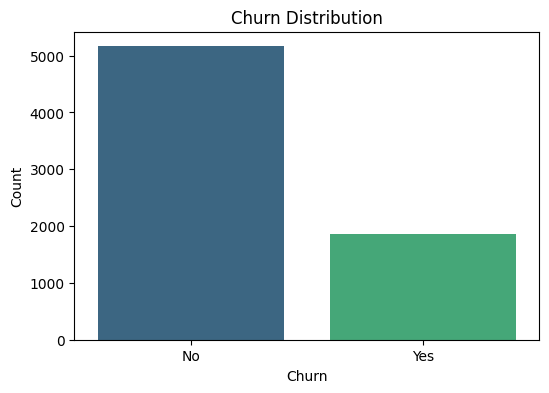

In [44]:
# Plot churn distribution
# Grafic
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis')

# Titles and labels
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


### **Churn by Contract**

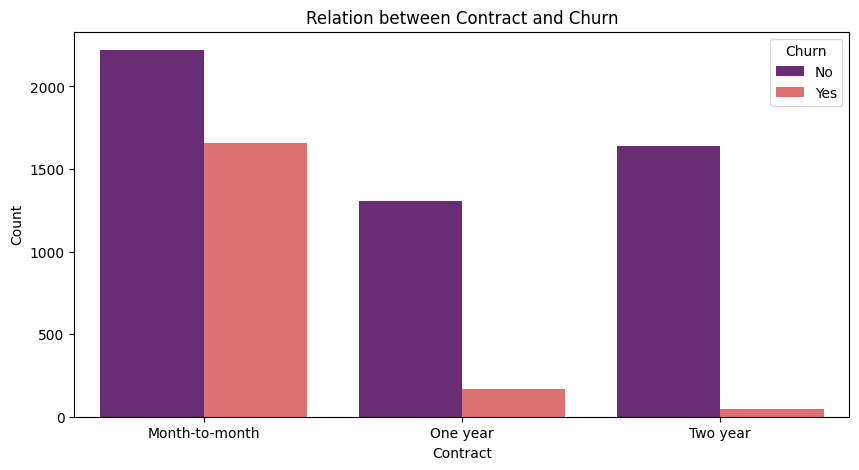

In [45]:
# Plot churn by contract type
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='magma')
plt.title('Relation between Contract and Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

### **Churn by Internet Service**

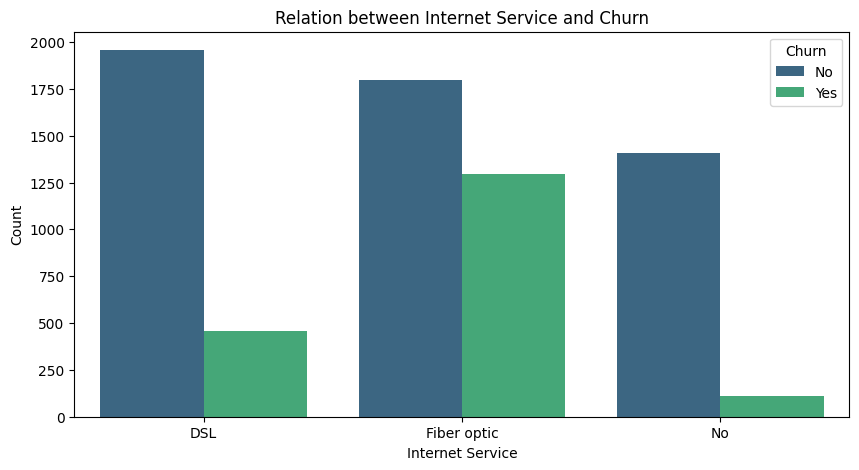

In [46]:
# Plot churn by internet service
plt.figure(figsize=(10, 5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')
plt.title('Relation between Internet Service and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

### **Churn by Payment Method**

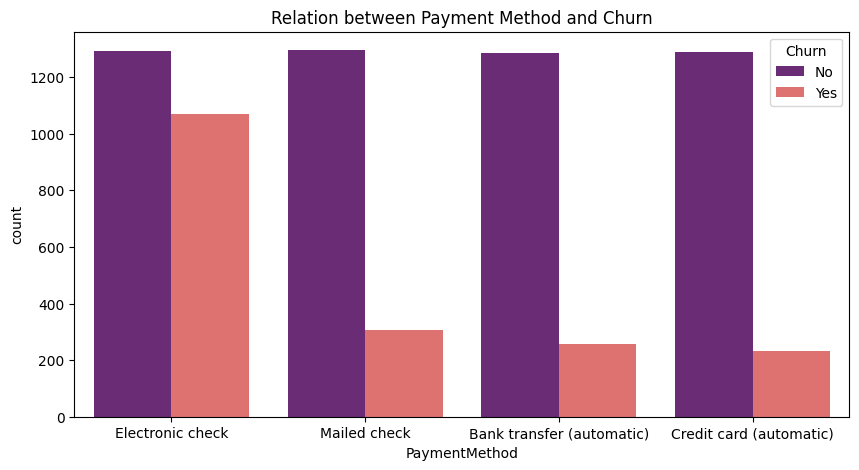

In [47]:
# Plot churn by payment method
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='magma')
# plt.xticks(rotation=15)
plt.title('Relation between Payment Method and Churn')
plt.show()

## **Data Transformation**

In [48]:
# Make a working copy for transformations
df_copy = df.copy()

In [49]:
# Drop identifier and impute TotalCharges with mean
column_id = 'customerID'

if column_id in df_copy.columns:
    df_copy.drop(columns=[column_id], axis=1, inplace=True)

df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
df_copy['TotalCharges'] = df_copy['TotalCharges'].fillna(df_copy['TotalCharges'].mean())

In [50]:
# Map binary categorical columns (Yes/No) to 1/0
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df_copy[col] = df_copy[col].map({'Yes': 1, 'No': 0})

In [51]:
# Preview transformed df_copy
df_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [52]:
# List columns in df_copy
df_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
# One-hot encode remaining categorical variables
df_final = pd.get_dummies(df_copy)
df_final

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,False,...,False,False,True,False,True,False,False,False,False,True
7039,0,1,1,72,1,1,103.20,7362.90,0,True,...,False,False,True,False,True,False,False,True,False,False
7040,0,1,1,11,0,1,29.60,346.45,0,True,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,4,1,1,74.40,306.60,1,False,...,True,False,False,True,False,False,False,False,False,True


In [54]:
# Check for nulls after encoding
df_final.isnull().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

In [55]:
# List column names after encoding
df_final.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)'

## **Model Training**

In [56]:
# Separate features (X) and target (y)
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [57]:
# Split into train/test sets (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Standardize features using training set statistics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print('¡Model Trained!')


¡Model Trained!


## **Basic test prediction**

In [60]:
# Predict on test set and print accuracy & classification report
pred = model.predict(X_test_scaled)
print(f'Global presition: {accuracy_score(y_test, pred):.2f}')
print('\nClasification report:')
print(classification_report(y_test, pred))

Global presition: 0.79

Clasification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [61]:
# Extract logistic regression coefficients into DataFrame
important = model.coef_[0]
features_names = X.columns

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': important})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance.head(5))
print(feature_importance.tail(5))

                        Feature  Importance
7                  TotalCharges    0.689447
14  InternetService_Fiber optic    0.367352
34      Contract_Month-to-month    0.310812
33          StreamingMovies_Yes    0.158654
30              StreamingTV_Yes    0.154262
                Feature  Importance
2            Dependents   -0.099356
13  InternetService_DSL   -0.299362
36    Contract_Two year   -0.304509
6        MonthlyCharges   -0.704723
3                tenure   -1.440516


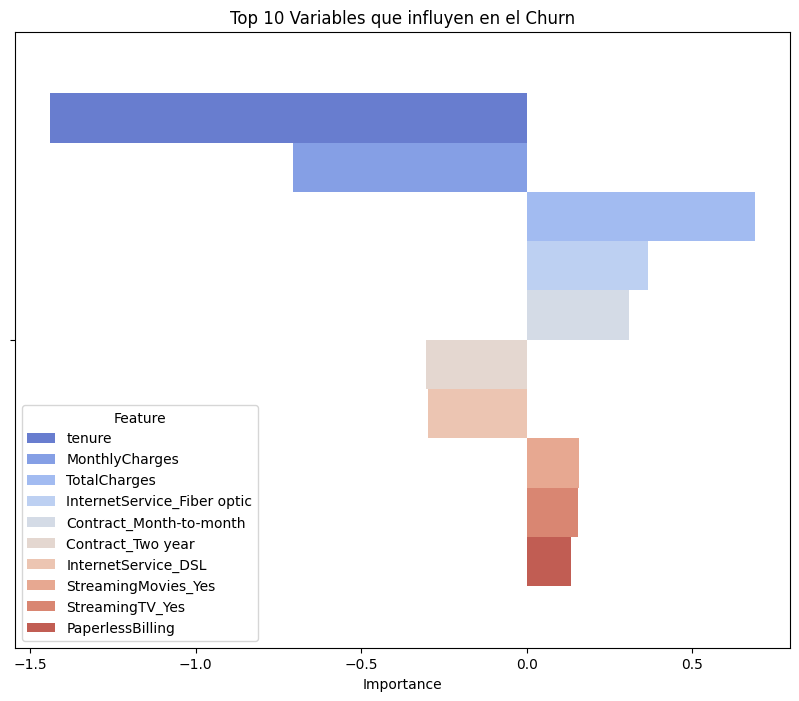

In [62]:
# Plot top 10 features by absolute coefficient
plt.figure(figsize=(10, 8))
top_10_features = feature_importance.reindex(feature_importance.Importance.abs().sort_values(ascending=False).index).head(10)
sns.barplot(x='Importance', hue='Feature', data=top_10_features, palette='coolwarm')
plt.title('Top 10 Variables que influyen en el Churn')
plt.show()